# Trainer Computer Vision
---

## **Module 1 - Step 2**

Objective : 
- Getting used to local python notebook environment (jupyter/jupyter-lab, vscode, etc...)
- Creating model case of binary class classification
- Creating model to classify face/no-face environment

### Import Library

In [1]:
import tensorflow as tf
import json
import matplotlib.pyplot as plt
import utilities_modul as util

### Read Credential

In [2]:
f = open("trainer-userdata.json")
data = json.load(f)
usermail = data["email"]

### Prepare Dataset

In [3]:
base_dir = "./dataset"

In [5]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.2
)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.2
)

In [6]:
img_shape = (224, 224, 3)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size= img_shape[:2],
    class_mode='binary',
    batch_size=8,
    subset='training')

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    shuffle=True,
    target_size= img_shape[:2],
    class_mode='binary',
    batch_size=2,
    subset='validation')

Found 32 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


### DNN Model

Add more layers if you want to!

Refer to https://www.tensorflow.org/api_docs/python/tf/keras/layers

In [30]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=img_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 8)       0         
_________________________________________________________________
flatten (Flatten)            (None, 98568)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                1577104   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,577,345
Trainable params: 1,577,345
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [33]:
# Cek Available RAM terlebih dahulu
!free -h

OSError: [Errno 12] Cannot allocate memory

In [34]:
# Jalankan kode ini ketika terjadi ResourceExhaustError
!echo "upi123" | sudo -S -k sh -c 'echo 3 > /proc/sys/vm/drop_caches' 

OSError: [Errno 12] Cannot allocate memory

In [35]:
with tf.device('/device:GPU:0'):
  history = model.fit(train_generator, 
                      epochs = 10, 
                      validation_data = validation_generator, 
                      verbose = 1)

Epoch 1/10
4/4 [==============================] - 124s 37s/step - loss: 0.6772 - accuracy: 0.7667 - val_loss: 4.7060e-05 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 9s 1s/step - loss: 0.2085 - accuracy: 0.8833 - val_loss: 1.0570e-04 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 2s 373ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 9.2669e-06 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 1s 312ms/step - loss: 2.7025e-05 - accuracy: 1.0000 - val_loss: 9.0988e-07 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 1s 340ms/step - loss: 1.8105e-06 - accuracy: 1.0000 - val_loss: 1.5571e-07 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 1s 284ms/step - loss: 1.7723e-06 - accuracy: 1.0000 - val_loss: 4.2622e-08 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 1s 308ms/step - loss: 1.8339e-07 - accuracy: 1.0000 - val_loss: 1.6785e-08 - 

### Model Evaluation

In [36]:
stats = model.evaluate(validation_generator)
print(f'Accuracy test = {stats[1]}\nLoss test = {stats[0]}')

4/4 [==============================] - 1s 66ms/step - loss: 3.9396e-09 - accuracy: 1.0000
Accuracy test = 1.0
Loss test = 3.939639281469454e-09


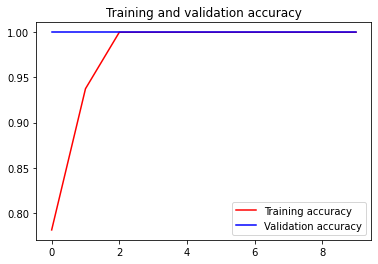

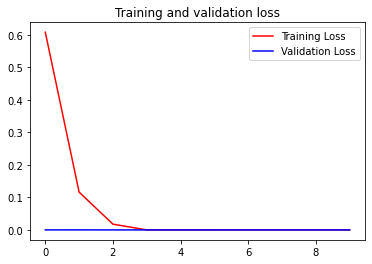

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [38]:
validation_generator.class_indices

{'empty': 0, 'myface': 1}

### Model Saving

In [39]:
model.save('model_module-1.h5')

### Grading

In [40]:
# DON'T EDIT THIS
# RUN ONLY ONE TIME AFTER YOU FINISH ALL THE CELLS ABOVE
util.give_grading(usermail=usermail, steps=2, optionalParam=stats)

[!] Grading success, please check the TrainerCV Portal
